This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xradar furuno backend

In this example, we read scn/scnx (furuno) data files using the xradar `furuno` xarray backend.

In [1]:
import glob
import gzip
import io
import wradlib as wrl
import wradlib_data
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load furuno scn Data

Data provided by University of Graz, Austria.

In [2]:
fpath = "furuno/0080_20210730_160000_01_02.scn.gz"
f = wradlib_data.DATASETS.fetch(fpath)
vol = xd.io.open_furuno_datatree(f, reindex_angle=False)

### Inspect RadarVolume

In [3]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2021-07-30T16:00:00Z'
│       time_coverage_end    <U20 80B '2021-07-30T16:00:14Z'
│       longitude            float64 8B 15.45
│       altitude             float64 8B 407.9
│       latitude             float64 8B 47.08
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 7.8
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          3
│       title:            None
│       institution:      None
│       references:       None
│       source:           Furuno
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 1376, range: 602)
│       Coordinates:
│         * azimuth            (azimuth) float64 11kB 0.21 0.47 0.74 ... 359.7 359.9
│           elevation          (azimuth) float64 11kB ...
│         * range              (range) float32 2kB 25.0 75.0 ... 3.002e+04 3.008e+04
│           time               (azimuth) datetime64[ns] 11kB 2021-07-30T16:00:06.2777...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│       Data variables: (12/14)
│           RATE               (azimuth, range) float64 7MB ...
│           DBZH               (azimuth, range) float64 7MB ...
│           VRADH              (azimuth, range) float64 7MB ...
│           ZDR                (azimuth, range) float64 7MB ...
│           KDP                (azimuth, range) float64 7MB ...
│           PHIDP              (azimuth, range) float64 7MB ...
│           ...                 ...
│           QUAL               (azimuth, range) uint16 2MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration
        Dimensions:           ()
        Data variables:
            radar_constant_v  float64 8B 9.144e-17
            radar_constant_h  float64 8B 9.575e-17

### Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2021-07-30T16:00:00Z'
│       time_coverage_end    <U20 80B '2021-07-30T16:00:14Z'
│       longitude            float64 8B 15.45
│       altitude             float64 8B 407.9
│       latitude             float64 8B 47.08
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 7.8
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          3
│       title:            None
│       institution:      None
│       references:       None
│       source:           Furuno
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 1376, range: 602)
│       Coordinates:
│         * azimuth            (azimuth) float64 11kB 0.21 0.47 0.74 ... 359.7 359.9
│           elevation          (azimuth) float64 11kB ...
│         * range              (range) float32 2kB 25.0 75.0 ... 3.002e+04 3.008e+04
│           time               (azimuth) datetime64[ns] 11kB 2021-07-30T16:00:06.2777...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│       Data variables: (12/14)
│           RATE               (azimuth, range) float64 7MB ...
│           DBZH               (azimuth, range) float64 7MB ...
│           VRADH              (azimuth, range) float64 7MB ...
│           ZDR                (azimuth, range) float64 7MB ...
│           KDP                (azimuth, range) float64 7MB ...
│           PHIDP              (azimuth, range) float64 7MB ...
│           ...                 ...
│           QUAL               (azimuth, range) uint16 2MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration
        Dimensions:           ()
        Data variables:
            radar_constant_v  float64 8B 9.144e-17
            radar_constant_h  float64 8B 9.575e-17

### Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 1, azimuth: 1376, range: 602)
    Coordinates:
      * azimuth            (azimuth) float64 11kB 0.21 0.47 0.74 ... 359.7 359.9
        elevation          (azimuth) float64 11kB ...
      * range              (range) float32 2kB 25.0 75.0 ... 3.002e+04 3.008e+04
        time               (azimuth) datetime64[ns] 11kB 2021-07-30T16:00:06.2777...
        longitude          float64 8B ...
        latitude           float64 8B ...
        altitude           float64 8B ...
    Dimensions without coordinates: sweep
    Data variables: (12/14)
        RATE               (azimuth, range) float64 7MB ...
        DBZH               (azimuth, range) float64 7MB ...
        VRADH              (azimuth, range) float64 7MB ...
        ZDR                (azimuth, range) float64 7MB ...
        KDP                (azimuth, range) float64 7MB ...
        PHIDP              (azimuth, range) float64 7MB ...
        ...                 ...
        QUAL               (azimuth, range) uint16 2MB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

### Georeferencing

In [6]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

### Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset.

In [7]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 1376, range: 602)> Size: 7MB
[828352 values with dtype=float64]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
  * azimuth     (azimuth) float64 11kB 0.21 0.47 0.74 1.0 ... 359.4 359.7 359.9
    elevation   (azimuth) float64 11kB 7.8 7.8 7.8 7.8 7.8 ... 7.8 7.8 7.8 7.8
  * range       (range) float32 2kB 25.0 75.0 125.0 ... 3.002e+04 3.008e+04
    time        (azimuth) datetime64[ns] 11kB 2021-07-30T16:00:06.277723500 ....
    longitude   float64 8B 15.45
    ...          ...
    y           (azimuth, range) float64 7MB 24.77 74.3 ... 2.973e+04 2.978e+04
    z           (azimuth, range) float64 7MB 411.3 418.1 ... 4.535e+03 4.542e+03
    gr          (azimuth, range) float64 7MB 24.77 74.3 ... 2.973e+04 2.978e+04
    rays        (azimuth, range) float64 7MB 0.21 0.21 0.21 ... 359.9 359.9
    bins        (azimuth, range) float32 3MB 25.0 75.0 ... 3.002e+04 3.008e+04
    crs_wkt     int64 8B 0
Attributes:
    units:          dBZ
    long_name:      Equivalent reflectivity factor H
    standard_name:  radar_equivalent_reflectivity_factor_h

### Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

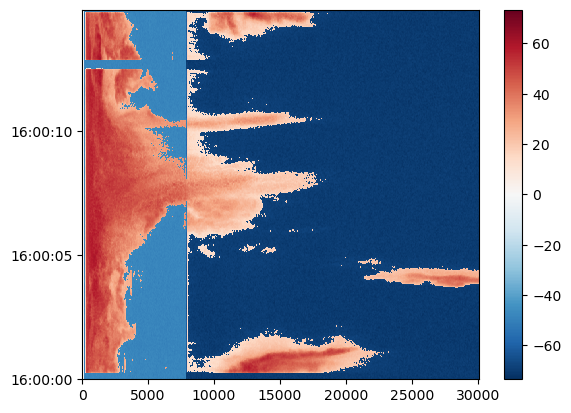

In [8]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

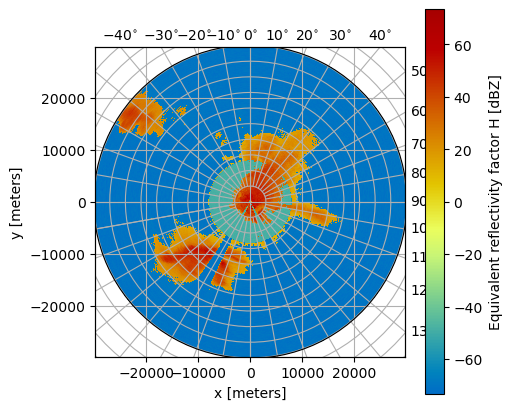

In [9]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

### Use `xr.open_dataset` to retrieve explicit group

## Load furuno scnx Data

Data provided by GFZ German Research Centre for Geosciences.

In [10]:
fpath = "furuno/2006_20220324_000000_000.scnx.gz"
f = wradlib_data.DATASETS.fetch(fpath)
vol = xd.io.open_furuno_datatree(f, reindex_angle=False)

### Inspect RadarVolume

In [11]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2022-03-24T00:00:01Z'
│       time_coverage_end    <U20 80B '2022-03-24T00:00:28Z'
│       longitude            float64 8B 13.24
│       altitude             float64 8B 38.0
│       latitude             float64 8B 53.55
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 0.5
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          10
│       title:            None
│       institution:      None
│       references:       None
│       source:           Furuno
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 722, range: 936)
│       Coordinates:
│         * azimuth            (azimuth) float64 6kB 0.19 0.68 1.16 ... 359.2 359.7
│           elevation          (azimuth) float64 6kB ...
│         * range              (range) float32 4kB 37.5 112.5 ... 7.009e+04 7.016e+04
│           time               (azimuth) datetime64[ns] 6kB 2022-03-24T00:00:17.65643...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│       Data variables: (12/14)
│           RATE               (azimuth, range) float64 5MB ...
│           DBZH               (azimuth, range) float64 5MB ...
│           VRADH              (azimuth, range) float64 5MB ...
│           ZDR                (azimuth, range) float64 5MB ...
│           KDP                (azimuth, range) float64 5MB ...
│           PHIDP              (azimuth, range) float64 5MB ...
│           ...                 ...
│           QUAL               (azimuth, range) uint16 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration
        Dimensions:                    ()
        Data variables:
            antenna_gain_h             int64 8B 337
            noise_power_short_pulse_h  int64 8B -604
            antenna_gain_v             int64 8B 338
            radar_constant_v           int64 8B -1296
            radar_constant_h           int64 8B -1294
            tx_power_v                 int64 8B 708
            tx_power_h                 int64 8B 724

### Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [12]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2022-03-24T00:00:01Z'
│       time_coverage_end    <U20 80B '2022-03-24T00:00:28Z'
│       longitude            float64 8B 13.24
│       altitude             float64 8B 38.0
│       latitude             float64 8B 53.55
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 0.5
│   Attributes:
│       Conventions:      None
│       instrument_name:  None
│       version:          10
│       title:            None
│       institution:      None
│       references:       None
│       source:           Furuno
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 722, range: 936)
│       Coordinates:
│         * azimuth            (azimuth) float64 6kB 0.19 0.68 1.16 ... 359.2 359.7
│           elevation          (azimuth) float64 6kB ...
│         * range              (range) float32 4kB 37.5 112.5 ... 7.009e+04 7.016e+04
│           time               (azimuth) datetime64[ns] 6kB 2022-03-24T00:00:17.65643...
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│       Data variables: (12/14)
│           RATE               (azimuth, range) float64 5MB ...
│           DBZH               (azimuth, range) float64 5MB ...
│           VRADH              (azimuth, range) float64 5MB ...
│           ZDR                (azimuth, range) float64 5MB ...
│           KDP                (azimuth, range) float64 5MB ...
│           PHIDP              (azimuth, range) float64 5MB ...
│           ...                 ...
│           QUAL               (azimuth, range) uint16 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration
        Dimensions:                    ()
        Data variables:
            antenna_gain_h             int64 8B 337
            noise_power_short_pulse_h  int64 8B -604
            antenna_gain_v             int64 8B 338
            radar_constant_v           int64 8B -1296
            radar_constant_h           int64 8B -1294
            tx_power_v                 int64 8B 708
            tx_power_h                 int64 8B 724

### Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [13]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 1, azimuth: 722, range: 936)
    Coordinates:
      * azimuth            (azimuth) float64 6kB 0.19 0.68 1.16 ... 359.2 359.7
        elevation          (azimuth) float64 6kB ...
      * range              (range) float32 4kB 37.5 112.5 ... 7.009e+04 7.016e+04
        time               (azimuth) datetime64[ns] 6kB 2022-03-24T00:00:17.65643...
        longitude          float64 8B ...
        latitude           float64 8B ...
        altitude           float64 8B ...
    Dimensions without coordinates: sweep
    Data variables: (12/14)
        RATE               (azimuth, range) float64 5MB ...
        DBZH               (azimuth, range) float64 5MB ...
        VRADH              (azimuth, range) float64 5MB ...
        ZDR                (azimuth, range) float64 5MB ...
        KDP                (azimuth, range) float64 5MB ...
        PHIDP              (azimuth, range) float64 5MB ...
        ...                 ...
        QUAL               (azimuth, range) uint16 1MB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

### Georeferencing

In [14]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

### Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. 

In [15]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 722, range: 936)> Size: 5MB
[675792 values with dtype=float64]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
  * azimuth     (azimuth) float64 6kB 0.19 0.68 1.16 1.69 ... 358.7 359.2 359.7
    elevation   (azimuth) float64 6kB 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
  * range       (range) float32 4kB 37.5 112.5 187.5 ... 7.009e+04 7.016e+04
    time        (azimuth) datetime64[ns] 6kB 2022-03-24T00:00:17.656439500 .....
    longitude   float64 8B 13.24
    ...          ...
    y           (azimuth, range) float64 5MB 37.5 112.5 ... 7.008e+04 7.015e+04
    z           (azimuth, range) float64 5MB 38.33 38.98 39.64 ... 939.0 940.3
    gr          (azimuth, range) float64 5MB 37.53 112.5 ... 7.008e+04 7.015e+04
    rays        (azimuth, range) float64 5MB 0.19 0.19 0.19 ... 359.7 359.7
    bins        (azimuth, range) float32 3MB 37.5 112.5 ... 7.009e+04 7.016e+04
    crs_wkt     int64 8B 0
Attributes:
    units:          dBZ
    long_name:      Equivalent reflectivity factor H
    standard_name:  radar_equivalent_reflectivity_factor_h

### Create simple plot

Currently the data dynamic range is left as read from the file. That way the difference between shortpulse and longpulse can be clearly seen.

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

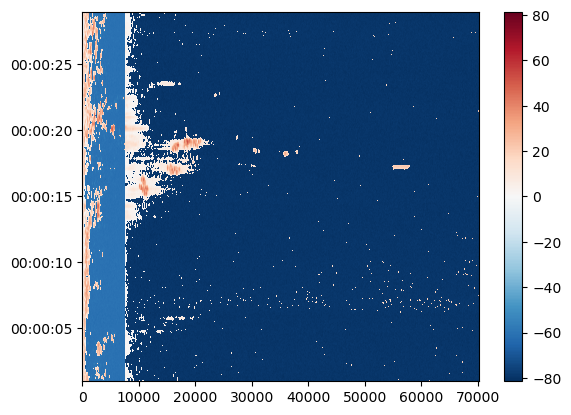

In [16]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

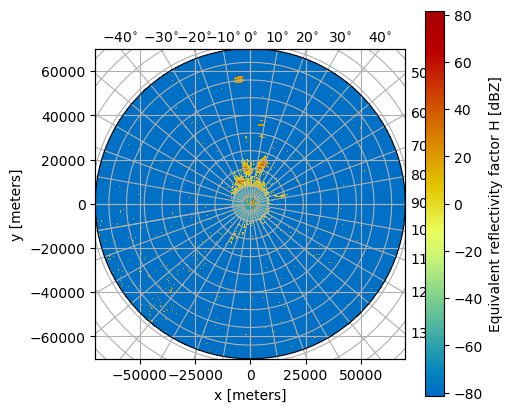

In [17]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## More Furuno loading mechanisms

### Use `xr.open_dataset` to retrieve explicit group

In [18]:
swp_b = xr.open_dataset(f, engine="furuno", backend_kwargs=dict(reindex_angle=False))
display(swp_b)

<xarray.Dataset> Size: 45MB
Dimensions:            (azimuth: 722, range: 936)
Coordinates:
  * azimuth            (azimuth) float64 6kB 0.19 0.68 1.16 ... 359.2 359.7
    elevation          (azimuth) float64 6kB ...
  * range              (range) float32 4kB 37.5 112.5 ... 7.009e+04 7.016e+04
    time               (azimuth) datetime64[ns] 6kB ...
    longitude          float64 8B ...
    latitude           float64 8B ...
    altitude           float64 8B ...
Data variables: (12/14)
    RATE               (azimuth, range) float64 5MB ...
    DBZH               (azimuth, range) float64 5MB ...
    VRADH              (azimuth, range) float64 5MB ...
    ZDR                (azimuth, range) float64 5MB ...
    KDP                (azimuth, range) float64 5MB ...
    PHIDP              (azimuth, range) float64 5MB ...
    ...                 ...
    QUAL               (azimuth, range) uint16 1MB ...
    sweep_mode         <U20 80B ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float64 8B ...
Attributes:
    source:                     Furuno
    version:                    10
    antenna_gain_h:             337
    antenna_gain_v:             338
    tx_power_h:                 724
    tx_power_v:                 708
    radar_constant_h:           -1294
    radar_constant_v:           -1296
    noise_power_short_pulse_h:  -604